In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [2]:
# Load dataset
data = pd.read_excel("heart_disease.xlsx")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [3]:
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Fill missing values for numerical columns with mean
data.fillna(data.select_dtypes(include=['number']).mean(), inplace=True)

# Fill missing values for categorical columns with mode
for col in data.select_dtypes(include=['object', 'category']):
    data[col].fillna(data[col].mode()[0], inplace=True)


Missing Values:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


C:\Users\Surbhi\AppData\Local\Temp\ipykernel_9088\3231644123.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [4]:
for col in data.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}: {data[col].unique()}")


Unique values in sex: ['Male' 'Female']
Unique values in cp: ['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']
Unique values in restecg: ['lv hypertrophy' 'normal' 'st-t abnormality']
Unique values in exang: [False True 'FALSE' 'TURE']
Unique values in slope: ['downsloping' 'flat' 'upsloping']
Unique values in thal: ['fixed defect' 'normal' 'reversable defect']


In [5]:
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype(str)  # Convert all values to string


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])


In [15]:
# Splitting features and target (assuming 'target' is the target column)
X = data.drop(columns=['num'])
y = data['num']

In [17]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Standardizing numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Initialize and train Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

In [23]:
# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.521978021978022
Precision: 0.5111590119282426
Recall: 0.521978021978022
F1 Score: 0.5160853654181522

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.75      0.75        89
           1       0.32      0.33      0.33        48
           2       0.40      0.45      0.43        22
           3       0.15      0.12      0.13        17
           4       0.00      0.00      0.00         6

    accuracy                           0.52       182
   macro avg       0.32      0.33      0.33       182
weighted avg       0.51      0.52      0.52       182



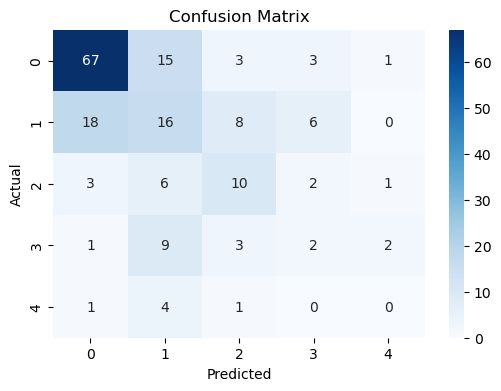

In [25]:
# Confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [27]:

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [29]:
# Best parameters and best model
print("Best Parameters:", grid_search.best_params_)
best_dt = grid_search.best_estimator_

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


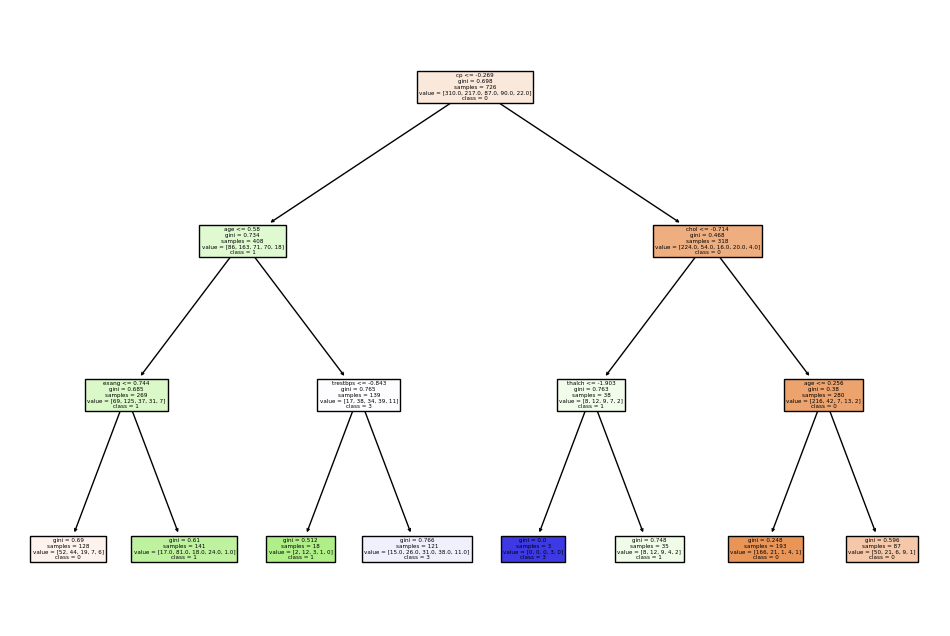

In [35]:
# Visualizing the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(best_dt, filled=True, feature_names=X.columns, class_names=[str(c) for c in y.unique()])
plt.show()


Interview Questions & Answers

1. Common Hyperparameters in Decision Trees
Hyperparameter	Description	Effect on Model
max_depth	Maximum depth of the tree.	
Prevents overfitting if too deep.
min_samples_split	Minimum samples required to split a node.	
Higher values reduce overfitting.
min_samples_leaf	Minimum samples required per leaf node.	
Controls the granularity of the tree.
criterion	"gini" (default) or "entropy".	Gini is faster, entropy is more precise.
max_features	Number of features to consider for best split.	
Reducing this can improve generalization.
    
2. Difference Between Label Encoding and One-Hot Encoding
Encoding Type	Description	When to Use?
Label Encoding	Assigns a numerical value to each category (e.g., Male = 0, Female = 1).	When categories have an order (e.g., low, medium, high).
One-Hot Encoding	Converts categorical values into separate binary columns.	When categories are nominal (e.g., colors: Red, Blue, Green).
Would you like me to g